In [1]:
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Datasets/LengthOfHospitalization.csv')
data.head()


,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [4]:
data.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [5]:
num_cols = data.select_dtypes(include=('number')).columns
num_cols

Index(['eid', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9',
       'lengthofstay'],
      dtype='object')

In [6]:
# Cleaning data
clean_data = data.copy()
clean_data[num_cols] = clean_data[num_cols].replace('?', pd.NA).apply(pd.to_numeric)
clean_data.replace(-1, pd.NA, inplace=True)
clean_data.fillna(clean_data.mean(numeric_only=True), inplace=True)

In [7]:
# Removing Outliers
for col in num_cols:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    clean_data[col] = clean_data[col].astype(float)
    median = clean_data[col].median()
    clean_data.loc[(clean_data[col] < low) | (clean_data[col] > high), col] = median
clean_data[num_cols] = clean_data[num_cols].fillna(clean_data[num_cols].mean())


In [8]:
clean_data.columns = clean_data.columns.str.strip()
clean_data['rcount'] = clean_data['rcount'].str[0].astype(int)

In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  float64
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  int32  
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  float64
 5   asthma                      100000 non-null  float64
 6   irondef                     100000 non-null  float64
 7   pneum                       100000 non-null  float64
 8   substancedependence         100000 non-null  float64
 9   psychologicaldisordermajor  100000 non-null  float64
 10  depress                     100000 non-null  float64
 11  psychother                  100000 non-null  float64
 12  fibrosisandother            100000 non-null  float64
 13  malnutrition   

In [10]:
def one_hot_encode(df, col):
    df_encoded = df.copy()
    df_encoded = pd.get_dummies(df, columns=col, prefix=col, dtype=int)
    return df_encoded

In [11]:
def ordinal_encode(df, col_order_map):
    df_encoded = df.copy()
    for col, order in col_order_map.items():
        mapping = {c:i for i,c in enumerate(order)}
        df_encoded[col] = df_encoded[col].map(mapping)
    return df_encoded

In [12]:
def zscore_normalize_features(x):
    mean = np.mean(x, axis=0)
    std = np.std(x,axis=0)
    safe_std = np.where(std == 0, 1, std)
    x_norm = (x - mean)/safe_std
    return x_norm

In [13]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    y_prediction = np.dot(x, w) + b
    se = (y_prediction - y)**2
    cost = (1/(2*m))*(np.sum(se))
    return cost

In [14]:
def compute_gradient(x, y, w, b):
    m,n = x.shape
    y_prediction = np.dot(x, w) + b
    error = (y_prediction - y)
    dw = (1/m)*np.dot(x.transpose(), error)
    db = (1/m)*np.sum(error)
    return dw, db

In [15]:
def gradient_descent(x, y, w_i, b_i, learning_rate, epsilon=1e-6, max_iter=10000):
    i = 0
    w = copy.deepcopy(w_i)
    b = b_i
    prev_cost = float('inf')
    while True:
        dw, db = compute_gradient(x, y, w, b) 
        gradient_norm = math.sqrt(np.sum(dw**2) + db**2)
        cost = compute_cost(x, y, w, b)
        if (gradient_norm < epsilon ) or (abs(prev_cost - cost) < epsilon):
            break;
        if i > max_iter:
            break;
        w -= learning_rate*dw
        b -= learning_rate*db
        if i % 100 == 0:
            print(f'Iteration {i}: Cost = {cost}')
        prev_cost = cost
        i += 1
    return w, b


In [16]:
def predict(x, w, b):
    prediction = np.dot(x, w) + b
    return prediction

In [17]:
encoded_data = one_hot_encode(clean_data, col=['gender'])
# encode_col = ['Status']
# col_order_map = {}
# for col in encode_col:
#     col_order_map[col] = clean_data[col].unique()
# encoded_data = ordinal_encode(encoded_data, col_order_map)
encoded_data.head(1)


,eid,vdate,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,gender_F,gender_M
0,1.0,8/29/2012,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.390722,30.432418,96.0,6.5,4.0,9/1/2012,B,3.0,1,0


In [18]:
x= encoded_data.drop(columns=['lengthofstay', 'vdate', 'discharged', 'facid'])
y = encoded_data['lengthofstay'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_features = x.columns
x_train_norm = zscore_normalize_features(x_train)
x_test_norm = zscore_normalize_features(x_test)

In [19]:
w_i = np.zeros(len(x_features))
b_i = 0
learning_rate = 0.5
w, b = gradient_descent(x_train_norm, y_train, w_i, b_i, learning_rate)
final_cost = compute_cost(x_train_norm, y_train, w, b)
print(final_cost)
print(w, b)

Iteration 0: Cost = 10.69744
1.1466732219864697
[-1.21367216e-03  1.74562265e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.08199384e-01 -2.25412445e-01 -3.41156652e-03
 -6.65426790e-04  4.45452659e-02 -8.29597283e-03 -8.33029020e-03
  1.04985783e-02  0.00000000e+00  5.69434190e-03 -9.02360674e-02
  9.02360674e-02] 3.991566022135417


In [20]:
prediction = predict(x_test_norm, w, b)
print('Predicted prices:', prediction)
print('Actual values: ', y_test)

Predicted prices: [2.68720805 2.94362006 2.87154367 ... 4.87617915 2.57309464 2.64048414]
Actual values:  [4. 1. 2. ... 6. 2. 6.]


In [21]:
y_mean = y_test.mean()
ss_reg = np.sum((predict(x_test_norm, w, b) - y_mean)**2)
ss_total = np.sum((y_test - y_mean)**2)
R2 = (ss_reg/ss_total)
print('R^2 score: ', R2)

R^2 score:  0.5847741014876708


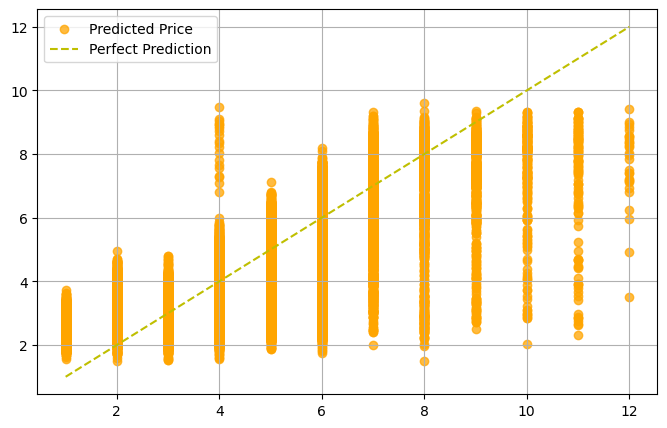

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, prediction, color='orange', alpha=0.75, label='Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'y--', label='Perfect Prediction')
plt.grid(True)
plt.legend()
plt.show()